In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.integrate import quad

I = 1j
pi = np.pi

Defining some helpful functions first:

In [43]:
def forward_difference(y , dx): #function for numerical differentiation using the forward difference formula
    if len(y) == 1:
        return 0
    dydx = np.array(len(y)*[0.00])
    for i in range(len(y)-1):
        dydx[i] = (y[i+1] - y[i])/(dx)
    
    dydx[-1] = (y[-1] - y[-2])/(dx)
    
    return dydx
        
##########################################################################################################################################    

def disc_pieces(x , y): #function to take a discontinuous piecewise function and return each of its pieces along with the size of each discontinuous jump 
    dy = np.array(len(y)*[0.00])
    num_discs = 0 #number of jumps
    size_jump = np.array([])  #size of the jump
    index_jump = np.array([] , dtype = int) #index AFTER which jump occurs
    
    for i in range(len(y)-1):
        dy[i] = (y[i+1] - y[i])
        
        if abs(dy[i]) >= np.pi:   #definining minimum size of a jump as pi
            #print("jump spotted")
            num_discs = num_discs + 1
            size_jump = np.append(size_jump , dy[i])
            #print(size_jump)
            index_jump = np.append(index_jump , i)
        
    
            
    #print(num_discs)
    function_subsets = (num_discs + 1)*[0.00]  #each element of this list will have a piece of the piecewise input function
    #print(len(function_subsets))
    #print(index_jump)
    
    if num_discs == 0:
        return y , 0
    
    starting_index = 0
    
    for i in range(len(function_subsets)-1):
        function_subsets[i] = y[starting_index:index_jump[i]+1]
        starting_index = index_jump[i]+1
    function_subsets[-1] = y[starting_index:]

    
    return function_subsets , size_jump
        
############################################################################################################################################
def nearest_multiple_of_pi(phase): #function to find the nearest multiple of pi
    if phase>=0:
        return (phase//pi)*pi
    else:
        return ((phase//pi)+1)*pi
    
############################################################################################################################################
    
def make_periodic(phase): #function to make the phase periodic
    if nearest_multiple_of_pi(phase) >= 0:
        if (nearest_multiple_of_pi(phase)/pi)%2 == 0:
            return (phase - nearest_multiple_of_pi(phase))
        else:
            return -(pi - (phase - nearest_multiple_of_pi(phase)))
    else:
        if (nearest_multiple_of_pi(phase)/pi)%2 == 0:
            return (phase - nearest_multiple_of_pi(phase))
        else:
            return (pi + (phase - nearest_multiple_of_pi(phase)))
        


Now defining the basics: values for $v^i$, $v^f$, $w^i$, $w^f$, $\gamma$; and defining the $k$ and $t$ arrays.

In [44]:
"""Defining the template for the di and df vectors, using Ritu's convention of v = (1 - delta) and w = (1 + delta)"""

delta_i = -0.9
delta_f = 0.9
gamma = 0.4

#N = 1000
k = np.linspace(-pi , pi , 1001)
kp = k[np.where(k==0)[0][0]:]
km = k[:np.where(k==0)[0][0]]
kp_index = np.where(k==0)[0][0]
dk = k[1]-k[0]
t = np.linspace(0 , 30 , 1000)


def v(quench = False):
    if not quench:
        return (1 - delta_i)
    else:
        return (1 - delta_f)
    
def w(quench = False):
    if not quench:
        return (1 + delta_i)
    else:
        return (1 + delta_f)


In [45]:
print(v(quench=False))
print(w(quench=False))
# print(1-delta_f)
# print(delta_f)
print("")
print(v(quench = True))
print(w(quench = True))

1.9
0.09999999999999998

0.09999999999999998
1.9


Now, we have:

$d_x = v + w e^{\gamma/2} \cos(k - i\frac{\gamma}{2})$

$d_y = w e^{\gamma/2} \sin(k - i\frac{\gamma}{2})$ 

In [46]:
"""Now constructing the actual di and df vectors"""

di_list = len(k)*[0.0]
df_list = len(k)*[0.0]

for i in range(len(k)):
    di_list[i] = [v() + w()*np.cos(k[i]) , w()*np.sin(k[i])]
    df_list[i] = [v(quench=True) + w(quench=True)*np.exp(gamma/2)*np.cos(k[i] - I*gamma/2) , w(quench=True)*np.exp(gamma/2)*np.sin(k[i] - I*gamma/2)]

In [47]:
def di(v,w,k):
    return v+ w*np.cos(k) , w*np.sin(k)

def df(v,w,gamma,k):
    return v(quench=True) + w(quench=True)*np.exp(gamma/2)*np.cos(k[i] - I*gamma/2) , w(quench=True)*np.exp(gamma/2)*np.sin(k[i] - I*gamma/2)

In [48]:
"""Converting the di and df lists to arrays for easy operation later"""

di = np.array(di_list , dtype = complex)
df = np.array(df_list , dtype = complex)

Normalizing the $\vec d^i$ and $ \vec d^f$ arrays. 

In [49]:
"""Normalizing the di and df vectors"""

di_normed = np.zeros(np.shape(di) , dtype = complex)
df_normed = np.zeros(np.shape(df) , dtype = complex)

for i in range(len(di)):
    di_normed[i] = ( 1/np.sqrt(np.sum(   di[i]**2   )) ) * di[i]
    df_normed[i] = ( 1/np.sqrt(np.sum(   df[i]**2   )) ) * df[i]

Plotting $\hat d^i$ and $\hat d^f$:

In [50]:
# plt.plot(np.real(df[:,0]) , np.real(df[:,1]) , label = r"$d^f$")
# plt.plot(np.real(di[:,0]) , np.real(di[:,1]) , label = r"$d^i$")
# plt.xlabel(r'Re$(d_{x})$')
# plt.ylabel(r'Re$(d_{y})$')
# plt.axvline(linewidth = '2' , color = 'black')
# plt.axhline(linewidth = '2' , color = 'black')
# # plt.xlim(-6,6)
# # plt.ylim(-6,6)
# plt.grid()
# plt.legend()
# plt.title("Representation of real part of d vectors in k-space")

# plt.figure()

# plt.plot(np.imag(df[:,0]) , np.imag(df[:,1]) , label = r"$d^f$")
# plt.plot(np.imag(di[:,0]) , np.imag(di[:,1]) , label = r"$d^i$")
# plt.xlabel(r'Im$(d_{x})$')
# plt.ylabel(r'Im$(d_{y})$')
# plt.axvline(linewidth = '2' , color = 'black')
# plt.axhline(linewidth = '2' , color = 'black')
# # plt.xlim(-6,6)
# # plt.ylim(-6,6)
# plt.grid()
# plt.legend()
# plt.title("Representation of imaginary part of d vectors in k-space")

Text(0.5, 1.0, '$d_f$ plotted for $\\delta_f = 0.90$')

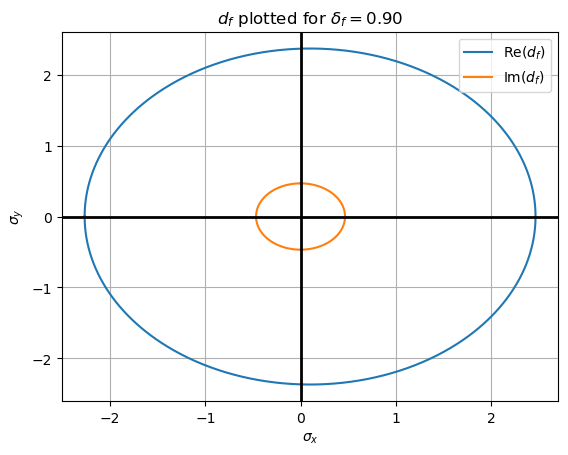

In [51]:
plt.plot(np.real(df[:,0]) , np.real(df[:,1]) , label = r"Re($d_f$)")
plt.plot(np.imag(df[:,0]) , np.imag(df[:,1]) , label = r"Im($d_f)$")
plt.xlabel(r'$\sigma_{x}$')
plt.ylabel(r'$\sigma_{y}$')
plt.axvline(linewidth = '2' , color = 'black')
plt.axhline(linewidth = '2' , color = 'black')
# plt.xlim(-6,6)
# plt.ylim(-6,6)
plt.grid()
plt.legend()
plt.title(r"$d_f$ plotted for $\delta_f = %0.2f$"%delta_f)


I'm defining $\hat d_i \cdot \hat d_f = \cos(\Delta_k)$  (based on the Hermitian case).

In [52]:
"""defining cos(delta_k)"""

cos_delta_k = np.array(len(k)*[0.00] , dtype = complex)

for i in range(len(k)):
    cos_delta_k[i] = np.dot(di_normed[i] , df_normed[i])

Now defining the eigenvalues = $\pm\kappa_{k}$, will drop the $k$ henceforth.

$\kappa^2 = d_x^2 + d_y^2 = v^2 + w^2 + vw (e^{-ik} + e^{ik + \gamma})$

$\nu = \kappa^{*}$

In [53]:
"""Defining the energies as a function of k (dispersion relation)"""

kappa_i = np.array(len(k)*[0.00] , dtype = complex)
kappa_f = np.array(len(k)*[0.00] , dtype = complex)

for i in range(len(k)):
    kappa_i[i] = np.sqrt(np.sum(   di[i]**2   ))
    kappa_f[i] = np.sqrt(np.sum(   df[i]**2   ))

nu_i = np.conjugate(kappa_i)
nu_f = np.conjugate(kappa_f)


Ritu's paper describes this $w(n,k)$ function. The Fischer Zeros occur at $k$ = $k_c$ where Re $[w(n,k_c) ] = 0$. I define this here. 

$w(n,k) = i\frac{(2n+1)\pi}{2\kappa^f} - \frac{1}{\kappa^f}\tanh^{-1}(\cos\Delta_k)$

In [54]:
"""Function to calculate the nth Fischer Zero"""

def kctc(n):
    w = I*(pi*(2*n+1))/(2*kappa_f) - (1/kappa_f)*np.arctanh(cos_delta_k)
    kc_index = np.where(np.abs(np.real(w)) == min(np.abs(np.real(w))))
    kc = k[kc_index]

    tc = np.imag(w[kc_index])

    return kc , tc

Now defining the Loschmidt Echo $G(t)$:

$$G(t) = \prod_k \left[ \cos(\kappa^f t) + i\cos(\Delta_k) \sin(\kappa^f t) \right]$$

And the Loschmidt Return Rate:

$$ I(t) = \frac{\log |G(t)|}{L} $$

where L is the length of the chain = length of the $k$ array. In the limit $L \rightarrow \infty $, we get:

$ I(t) = \frac{-1}{2\pi} \oint_k \log |G_k(t)| dk $.

In [55]:
"""Defining the Loschmidt amplitude and the Loschmidt return rate"""

Gk = np.zeros((len(t) , len(k)) , dtype = complex)

for i in tqdm(range(len(t))):
    for k_val in range(len(k)):
        Gk[i,k_val] = np.cos(kappa_f[k_val]*t[i])  + I*cos_delta_k[k_val]*np.sin(kappa_f[k_val]*t[i])
        

limit_rate = -(1/(2*pi))*np.trapz(np.log(np.abs(Gk)) , k , axis=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [56]:
kappa_f

array([2.21856721-2.57912387e-18j, 2.21856932-1.32323795e-04j,
       2.21857565-2.64641610e-04j, ..., 2.21857565+2.64641610e-04j,
       2.21856932+1.32323795e-04j, 2.21856721+2.57912387e-18j])

In [57]:
Gk[100,:]

array([0.92896896-0.37827736j, 0.92912905-0.37812777j,
       0.92928469-0.37797319j, ..., 0.92863506-0.37856157j,
       0.92880434-0.37842196j, 0.92896896-0.37827736j])

In [58]:
k

array([-3.14159265, -3.13530947, -3.12902628, ...,  3.12902628,
        3.13530947,  3.14159265])

(0.0, 0.5)

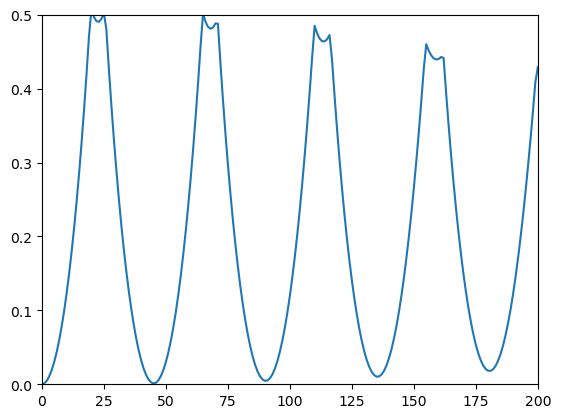

In [59]:
plt.plot(limit_rate)
plt.xlim(0 , 200)
plt.ylim(0,0.5)

In [60]:
def dphi_d(t_index , k_index):
    
    z = v() + w()*np.exp(-I*k[k_index])
    z_star = v() + w()*np.exp(I*k[k_index])
    z_gamma = z_star
    z_star_gamma = z

    zf = v(quench=True) + w(quench=True)*np.exp(-I*k[k_index])
    zf_star = v(quench=True) + w(quench=True)*np.exp(I*k[k_index])
    zf_gamma = v(quench=True) + w(quench=True)*np.exp(gamma + I*k[k_index])
    zf_star_gamma = v(quench=True) + w(quench=True)*np.exp(gamma - I*k[k_index])

    mu = (z*kappa_f[k_index])/(zf*kappa_i[k_index])
    mu_star = (z_star*nu_f[k_index])/(zf_star*kappa_i[k_index])
    mu_gamma = (z_star*kappa_f[k_index])/(zf_gamma*kappa_i[k_index])
    mu_star_gamma = (z*nu_f)/(zf_star_gamma*kappa_i[k_index])

    alpha = (1+mu)/2
    beta = (1-mu)/2

    alpha_star = (1+mu_star)/2
    beta_star = (1-mu_star)/2

    alpha_gamma = (1+mu_gamma)/2
    beta_gamma = (1-mu_gamma)/2

    alpha_star_gamma = (1+mu_star_gamma)/2
    beta_star_gamma = (1-mu_star_gamma)/2

    rho = (1/2) + (zf_star*kappa_f[k_index])/(2*zf_gamma*nu_f[k_index])
    sigma = (1/2) - (zf_star*kappa_f[k_index])/(2*zf_gamma*nu_f[k_index])

    rho_star = (1/2) + (zf*nu_f[k_index])/(2*zf_star_gamma*kappa_f[k_index])
    sigma_star = (1/2) - (zf*nu_f[k_index])/(2*zf_star_gamma*kappa_f[k_index])

    Sbrasm = beta*np.exp(-I*t[t_index]*kappa_f[k_index])*rho_star - alpha*np.exp(I*t[t_index]*kappa_f[k_index])*sigma_star
    Sbsarm = beta*np.exp(-I*t[t_index]*kappa_f[k_index])*sigma_star - alpha*np.exp(I*t[t_index]*kappa_f[k_index])*rho_star

    Sbrasp = beta*np.exp(-I*t[t_index]*kappa_f[k_index])*rho_star + alpha*np.exp(I*t[t_index]*kappa_f[k_index])*sigma_star
    Sbsarp = beta*np.exp(-I*t[t_index]*kappa_f[k_index])*sigma_star + alpha*np.exp(I*t[t_index]*kappa_f[k_index])*rho_star

    x = (kappa_f[k_index]/2)*Sbrasm + (nu_f[k_index]/2)*Sbrasp
    y = (kappa_f[k_index]/2)*Sbsarm - (nu_f[k_index]/2)*Sbsarp

    numerator = -(  np.exp(I*t[t_index]*nu_f[k_index])*beta_star*x + np.exp(-I*t[t_index]*nu_f[k_index])*alpha_star*y  )
    denominator = beta_star*Sbrasp*np.exp(I*nu_f[k_index]*t[t_index]) + alpha_star*Sbsarp*np.exp(-I*nu_f[k_index]*t[t_index])

    dphi = numerator / denominator

    return dphi 
    



In [61]:
# phi_dyn_scipy = np.zeros((len(t) , len(k)) , dtype = complex)

# for i in tqdm(range(len(t))):
#     for k_vals in range(len(k)):
#         phi_dyn_scipy[i,k_vals] = quad(dphi_d , 0 , i , args = k_vals)[0]

#Need to redefine the dphid function without using indices, for better integral

In [62]:
"""Define the dphi array using the dphi_d function"""
dphi_array = np.zeros((len(t) , len(k)) , dtype = complex)

for i in tqdm(range(len(t))):
    for k_val in range(len(k)):
        dphi_array[i,k_val] = dphi_d(i , k_val)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [63]:
"""Defining the dynamical phase from dphi (by performing the time integral) here"""
phi_dyn = np.zeros((len(t) , len(k)) , dtype = complex)

for i in tqdm(range(len(t))):
    phi_dyn[i] = np.trapz(dphi_array[:i] , t[:i] , axis = 0)



  0%|          | 0/1000 [00:00<?, ?it/s]

In [64]:
"""Defining the Pancharatnam Geometric Phase (PGP) and dnu, where nu = DTOP"""

PGP = np.zeros((len(t) , len(k)) , dtype = complex)

for i in tqdm(range(len(t))):  # i know i don't need to loop this, PGP = angle(Gk) - phi_dyn will suffice, will change later
    for k_val in range(len(k)):
        if (np.imag(phi_dyn[i,k_val]) + np.imag(-I*np.log(Gk[i,k_val] / np.abs(Gk[i,k_val]))))>1e-10:
            break
        PGP[i,k_val] = make_periodic(   make_periodic(np.real(-I*np.log(   Gk[i,k_val] / np.abs(Gk[i,k_val])  ) ))   - make_periodic(  np.real(phi_dyn[i,k_val])  )   )




    
# d_dk = FinDiff(0,dk)

# for i in range(len(t)):
#     dnu[i] = d_dk(PGP[i])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [65]:
PGP_plus = PGP[: , np.where(k==0)[0][0]:]

PGP_minus = PGP[: , :np.where(k==0)[0][0]]

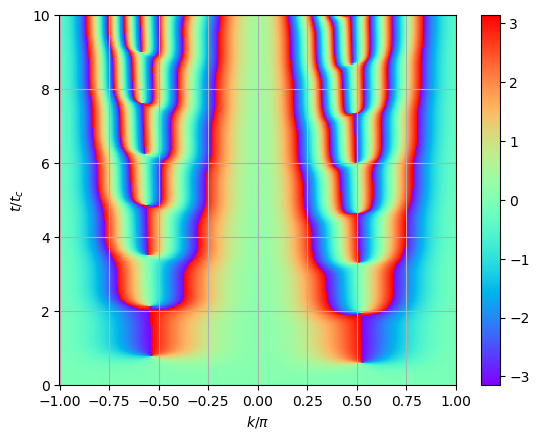

In [66]:
#%matplotlib qt
plt.pcolormesh(k/pi , t , np.real(PGP) , cmap = 'rainbow')
plt.colorbar()
#plt.grid()
plt.xlabel(r'$k/\pi$')
plt.ylabel(r'$t/t_c$')
# plt.clim(-8 , 0)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.yscale('log')
# #plt.xlim(10,95)
# plt.ylim(10,4000)
# plt.xlim(0,1)
# plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.grid()
#plt.xlim(0,1)
plt.ylim(0,10)
plt.show()



In [67]:
pieces_plus = len(PGP_plus)*[0.00]
jump_sizes_plus = len(PGP_plus)*[0.00]

for i in range(len(PGP_plus)):
    #print("index = ",i)
    pieces_plus[i] , jump_sizes_plus[i] = disc_pieces( kp , PGP_plus[i] )

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12184\174201378.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  dy[i] = (y[i+1] - y[i])


In [68]:
dnu_plus = len(PGP_plus)*[0.00]

for i in range(len(dnu_plus)):
    if not np.shape(jump_sizes_plus[i]): #if there is no jump...
        dnu_plus[i] = forward_difference(pieces_plus[i] , dk)
        
    else:  #if there is a nonzero number of jumps
        dnu_plus[i] = [forward_difference(arr , dk) for arr in pieces_plus[i]]
        
        

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12184\174201378.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  dydx[i] = (y[i+1] - y[i])/(dx)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12184\174201378.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  dydx[-1] = (y[-1] - y[-2])/(dx)


In [69]:
nu_plus = len(PGP_plus)*[0.00]

for i in range(len(nu_plus)):
    if not np.shape(jump_sizes_plus[i]): #if there is no jump...
        nu_plus[i] = (-1/(2*pi))*np.trapz(pieces_plus[i] , dx = dk)
        
    else:  #if there is a nonzero number of jumps
        nu_plus[i] = (-1/(2*pi))*(np.sum([np.trapz(arr , dx = dk) for arr in pieces_plus[i]]) + np.sum(jump_sizes_plus[i]))

In [70]:
pieces_minus = len(PGP_minus)*[0.00]
jump_sizes_minus = len(PGP_minus)*[0.00]

for i in range(len(PGP_minus)):
    #print("index = ",i)
    pieces_minus[i] , jump_sizes_minus[i] = disc_pieces( km , PGP_minus[i] )

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12184\174201378.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  dy[i] = (y[i+1] - y[i])


In [71]:
dnu_minus = len(PGP_minus)*[0.00]

for i in range(len(dnu_minus)):
    if not np.shape(jump_sizes_minus[i]): #if there is no jump...
        dnu_minus[i] = forward_difference(pieces_minus[i] , dk)
        
    else:  #if there is a nonzero number of jumps
        dnu_minus[i] = [forward_difference(arr , dk) for arr in pieces_minus[i]]
        
        

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12184\174201378.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  dydx[i] = (y[i+1] - y[i])/(dx)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12184\174201378.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  dydx[-1] = (y[-1] - y[-2])/(dx)


In [72]:
nu_minus = len(PGP_minus)*[0.00]

for i in range(len(nu_minus)):
    if not np.shape(jump_sizes_minus[i]): #if there is no jump...
        nu_minus[i] = -(-1/(2*pi))*np.trapz(pieces_minus[i] , dx = dk) #this integral is being done from -pi to 0, so i added an extra minus sign at the front so that the integral is effectively from 0 to -pi
        
    else:  #if there is a nonzero number of jumps
        nu_minus[i] = -(-1/(2*pi))*(np.sum([np.trapz(arr , dx = dk) for arr in pieces_minus[i]]) + np.sum(jump_sizes_minus[i]))

In [73]:
#np.sum([np.trapz(arr , dx = dk) for arr in pieces[300]])

Text(0.5, 0, 'time')

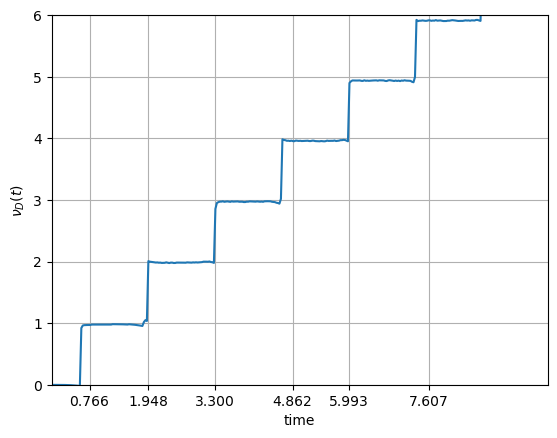

In [78]:
plt.plot(t , np.array(nu_plus))
plt.xticks([kctc(0)[1][0] ,  kctc(1)[1][0]  ,  kctc(2)[1][0]  ,  kctc(3)[1][0] , kctc(4)[1][0] , kctc(5)[1][0]])
plt.xlim(0,10)
plt.ylim(0,6)
plt.grid()
plt.ylabel(r'$\nu_{D}(t)$')
plt.xlabel("time")

Text(0.5, 0, 'time')

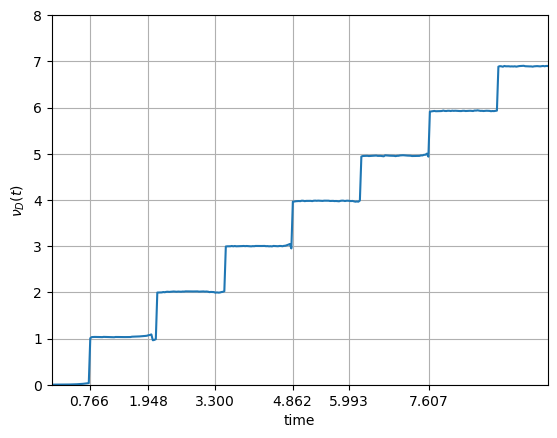

In [79]:
plt.plot(t , np.array(nu_minus))
plt.xticks([kctc(0)[1][0] ,  kctc(1)[1][0]  ,  kctc(2)[1][0]  ,  kctc(3)[1][0] , kctc(4)[1][0] , kctc(5)[1][0]])
plt.xlim(0,10)
plt.ylim(0,8)
plt.grid()
plt.ylabel(r'$\nu_{D}(t)$')
plt.xlabel("time")

Text(0.5, 0, '$t$')

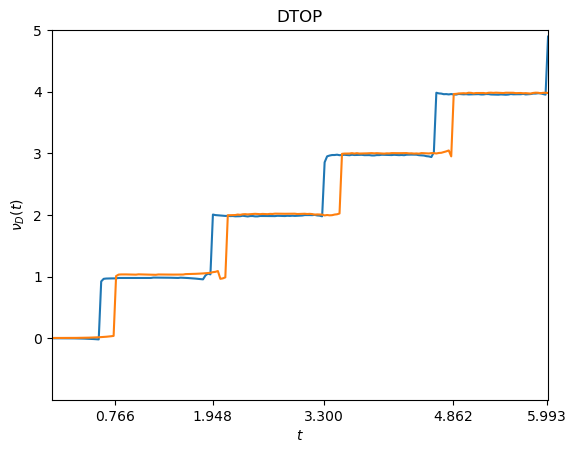

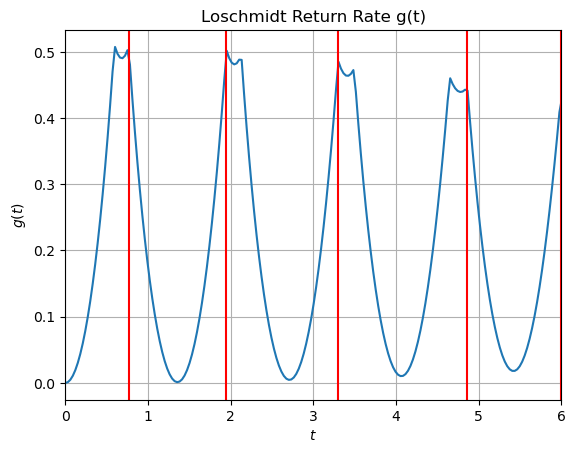

In [76]:
plt.plot(t , nu_plus)
plt.ylabel(r'$\nu_{D}(t)$')
plt.xlabel(r'$t$')
#plt.xticks([1 , 3 , 5 , 7 , 9])
plt.grid()
plt.yticks([0,1,2,3,4,5])
plt.xticks([kctc(0)[1][0] , kctc(1)[1][0] , kctc(2)[1][0] , kctc(3)[1][0] , kctc(4)[1][0]])
plt.ylim(-1 , 5)
plt.xlim(0,6)
# plt.xlim(0,1)
# plt.ylim(0,40)
#plt.axvline(tc)
plt.title("DTOP")
# plt.axvline(kctc(0)[1][0] , color='red')
# plt.axvline(kctc(1)[1][0] , color='red')
# plt.axvline(kctc(2)[1][0] , color='red')
# plt.axvline(kctc(3)[1][0] , color='red')
# plt.axvline(kctc(4)[1][0] , color='red')
# plt.axvline(kctc(5)[1][0] , color='red')
# plt.axvline(kctc(6)[1][0] , color='red')
# plt.axvline(kctc(7)[1][0] , color='red')
# plt.axvline(kctc(8)[1][0] , color='red')
# plt.axvline(kctc(9)[1][0] , color='red')
#plt.ylim(-2,2)
#plt.savefig("DTOP_plot.png")
############################################################################################################

plt.plot(t , nu_minus)
plt.ylabel(r'$\nu_{D}(t)$')
plt.xlabel(r'$t$')
#plt.xticks([1 , 3 , 5 , 7 , 9])
plt.grid()
plt.yticks([0,1,2,3,4,5])
plt.xticks([kctc(0)[1][0] , kctc(1)[1][0] , kctc(2)[1][0] , kctc(3)[1][0] , kctc(4)[1][0]])
plt.ylim(-1 , 5)
plt.xlim(0,6)
# plt.xlim(0,1)
# plt.ylim(0,40)
#plt.axvline(tc)
plt.title("DTOP")
# plt.axvline(kctc(0)[1][0] , color='red')
# plt.axvline(kctc(1)[1][0] , color='red')
# plt.axvline(kctc(2)[1][0] , color='red')
# plt.axvline(kctc(3)[1][0] , color='red')
# plt.axvline(kctc(4)[1][0] , color='red')
# plt.axvline(kctc(5)[1][0] , color='red')
# plt.axvline(kctc(6)[1][0] , color='red')
# plt.axvline(kctc(7)[1][0] , color='red')
# plt.axvline(kctc(8)[1][0] , color='red')
# plt.axvline(kctc(9)[1][0] , color='red')
#plt.ylim(-2,2)
#plt.savefig("DTOP_plot.png")




############################################################################################################

plt.figure()
plt.plot(t,limit_rate)
plt.grid()
plt.xlim(0,6)
#plt.yticks([0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10])
#plt.axvline(tc , color='red')
# plt.axvline(3*tc , color='red')
# plt.axvline(5*tc , color='red')
# plt.axvline(7*tc , color='red')
#plt.xticks([1 , 3 , 5 , 7 , 9])
#plt.xticks([tc , 3*tc , 5*tc , 7*tc] , [r'$t_c$' , r'$3t_c$' , r'$5t_c$' , r'$7t_c$'])
plt.title("Loschmidt Return Rate g(t)")

plt.axvline(kctc(0)[1][0] , color='red')
plt.axvline(kctc(1)[1][0] , color='red')
plt.axvline(kctc(2)[1][0] , color='red')
plt.axvline(kctc(3)[1][0] , color='red')
plt.axvline(kctc(4)[1][0] , color='red')


plt.ylabel(r'$g(t)$')
plt.xlabel(r'$t$')


#plt.ylim(0,2)
#plt.xlim(0,1)

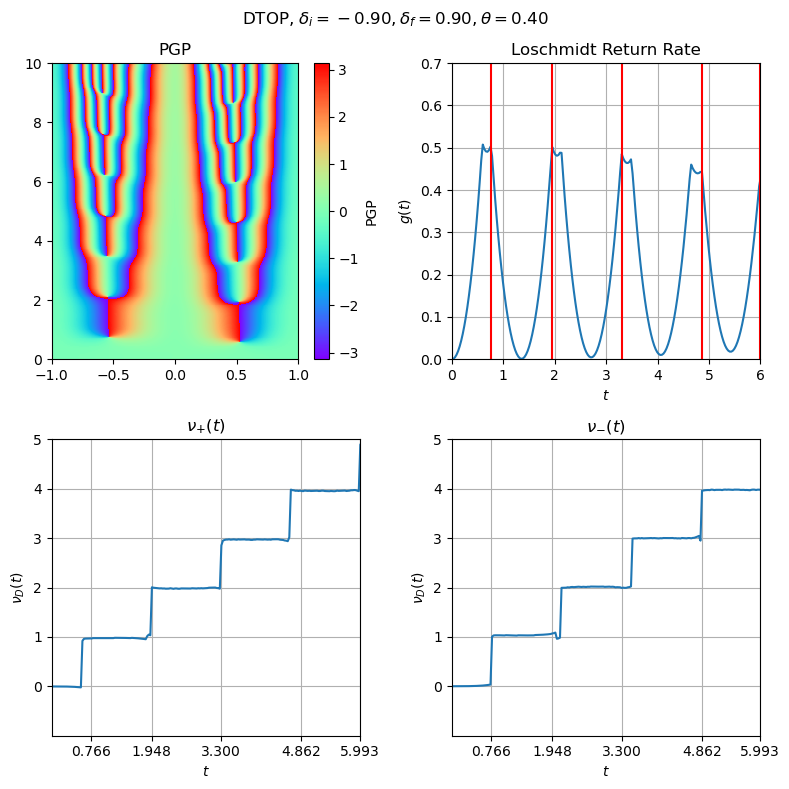

In [80]:
fig , axs = plt.subplots( 2 , 2 , figsize = (8,8))
fig.suptitle(r'DTOP, $\delta_i = %0.2f, \delta_f = %0.2f, \theta = %0.2f$' %(delta_i , delta_f , gamma)) 
img00 = axs[0,0].pcolormesh(k/pi , t , np.real(PGP) , cmap = 'rainbow')
#axs[0,0].set_ylim(1,4000)
axs[0,0].set_title('PGP')
plt.colorbar(img00 , ax = axs[0,0] , label = "PGP")
axs[0,0].set_ylim(0,10)
#img00.set_clim(-8,0)


axs[0,1].plot(t , limit_rate )
#axs[0,1].set_yscale('log')
axs[0,1].set_xlim(0,6)
axs[0,1].set_ylim(0,0.7)
axs[0,1].set_title('Loschmidt Return Rate')
axs[0,1].grid()
axs[0,1].axvline(kctc(0)[1][0] , color='red')
axs[0,1].axvline(kctc(1)[1][0] , color='red')
axs[0,1].axvline(kctc(2)[1][0] , color='red')
axs[0,1].axvline(kctc(3)[1][0] , color='red')
axs[0,1].axvline(kctc(4)[1][0] , color='red')
axs[0,1].set_ylabel(r'$g(t)$')
axs[0,1].set_xlabel(r'$t$')


axs[1,0].plot(t , np.array(nu_plus) )
axs[1,0].set_xlim(0,6)
axs[1,0].set_title('Loschmidt Return Rate')
axs[1,0].grid()
axs[1,0].set_ylabel(r'$\nu_{D}(t)$')
axs[1,0].set_xlabel(r'$t$')
axs[1,0].set_yticks([0,1,2,3,4,5])
axs[1,0].set_xticks([kctc(0)[1][0] , kctc(1)[1][0] , kctc(2)[1][0] , kctc(3)[1][0] , kctc(4)[1][0]])
axs[1,0].set_ylim(-1 , 5)
#axs[1,0].set_xlim(0,6)
axs[1,0].set_title(r"$\nu_{+}(t)$")

axs[1,1].plot(t , np.array(nu_minus) )
axs[1,1].set_xlim(0,6)
axs[1,1].set_title('Loschmidt Return Rate')
axs[1,1].grid()
axs[1,1].set_ylabel(r'$\nu_{D}(t)$')
axs[1,1].set_xlabel(r'$t$')
axs[1,1].set_yticks([0,1,2,3,4,5])
axs[1,1].set_xticks([kctc(0)[1][0] , kctc(1)[1][0] , kctc(2)[1][0] , kctc(3)[1][0] , kctc(4)[1][0]])
axs[1,1].set_ylim(-1 , 5)
#axs[1,1].set_xlim(0,6)
axs[1,1].set_title(r"$\nu_{-}(t)$")



plt.tight_layout()